<a href="https://colab.research.google.com/github/VenkataJanga/Machine-Learning/blob/master/Credit_Card_Detection_Logg_reg_KNCL_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve

In [0]:
cr_data = pd.read_csv('creditcard.csv')


In [8]:
cr_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
#Explore the Data set
cr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
Time      15936 non-null int64
V1        15936 non-null float64
V2        15936 non-null float64
V3        15936 non-null float64
V4        15936 non-null float64
V5        15936 non-null float64
V6        15936 non-null float64
V7        15936 non-null float64
V8        15936 non-null float64
V9        15936 non-null float64
V10       15936 non-null float64
V11       15936 non-null float64
V12       15936 non-null float64
V13       15936 non-null float64
V14       15936 non-null float64
V15       15936 non-null float64
V16       15936 non-null float64
V17       15936 non-null float64
V18       15936 non-null float64
V19       15936 non-null float64
V20       15936 non-null float64
V21       15936 non-null float64
V22       15936 non-null float64
V23       15935 non-null float64
V24       15935 non-null float64
V25       15935 non-null float64
V26       15935 non-null float64
V2

In [10]:
cr_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
print(cr_data.shape)

(15936, 31)


In [12]:
print(cr_data.describe())

               Time            V1  ...        Amount         Class
count  15936.000000  15936.000000  ...  15935.000000  15935.000000
mean   12121.217871     -0.254293  ...     66.390222      0.004581
std     8982.283843      1.843083  ...    189.355098      0.067531
min        0.000000    -28.344757  ...      0.000000      0.000000
25%     3633.500000     -0.970824  ...      5.490000      0.000000
50%    10980.000000     -0.318478  ...     15.950000      0.000000
75%    20621.500000      1.161949  ...     53.890000      0.000000
max    27371.000000      1.960497  ...   7712.430000      1.000000

[8 rows x 31 columns]


In [0]:
# its huge data set so we i am doing analyse for sample data from dataset
data = cr_data.sample(frac= 0.1, random_state = 1)

In [15]:
print(data.shape)

(1594, 31)


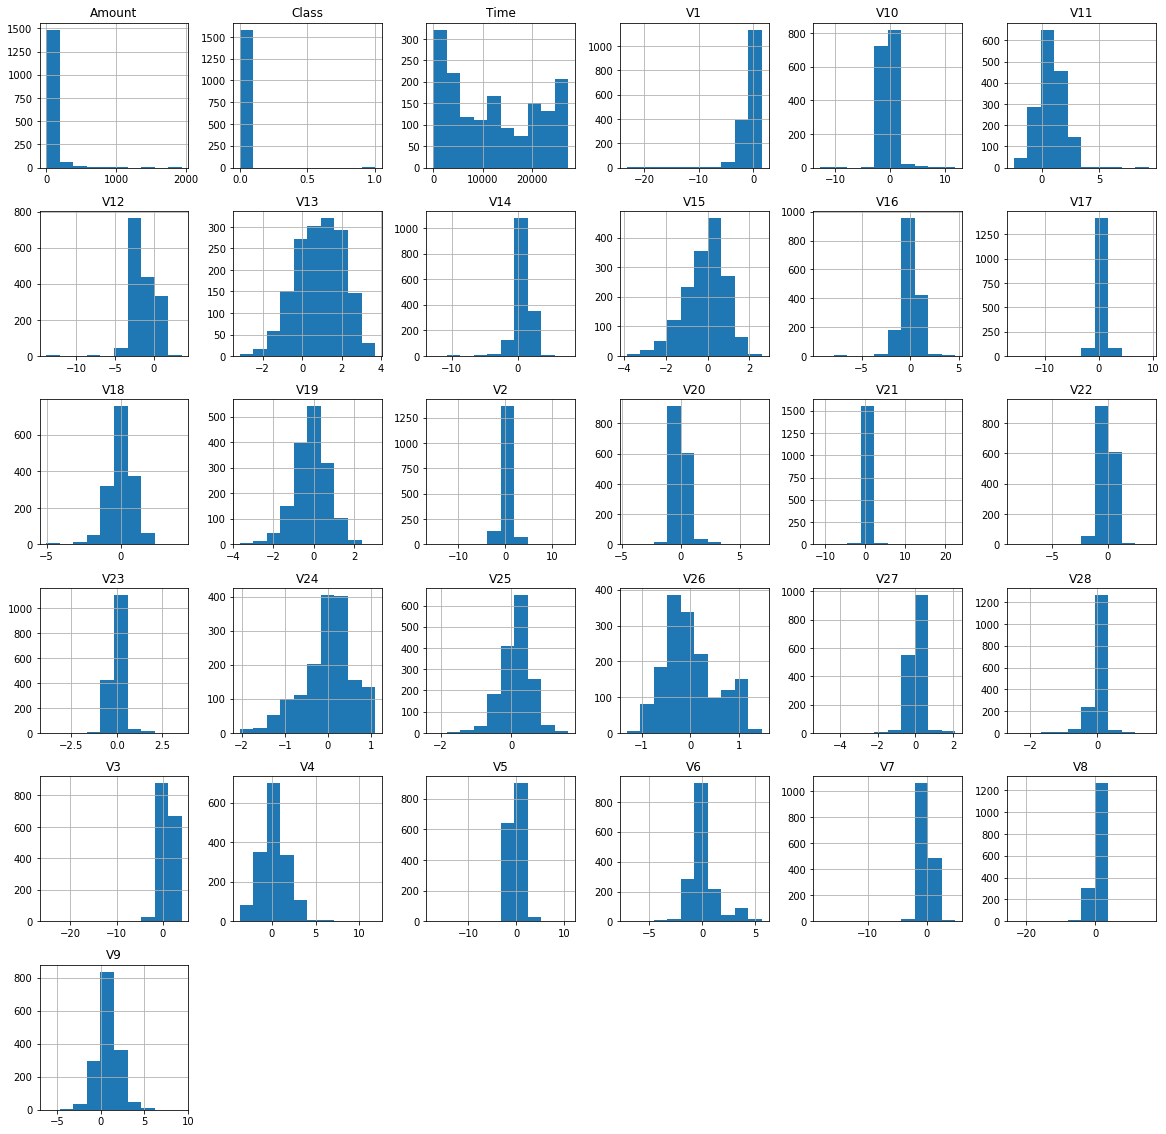

In [19]:
# plot histgram for each parameter
data.hist(figsize=(20,20))
plt.show()

In [22]:
# determine the number of fraut cases in data sets
data['Class'].value_counts()

0.0    1585
1.0       9
Name: Class, dtype: int64

In [25]:
fraud_cases = data[data['Class']==0]
valid_cases = data[data['Class']==1]
outlier_fraction = len(fraud_cases) / float(len(valid_cases))
print(outlier_fraction)

print('Fraud Cases {}'.format(len(fraud_cases)))
print('Valid Cases {}'.format(len(valid_cases)))

176.11111111111111
Fraud Cases 1585
Valid Cases 9


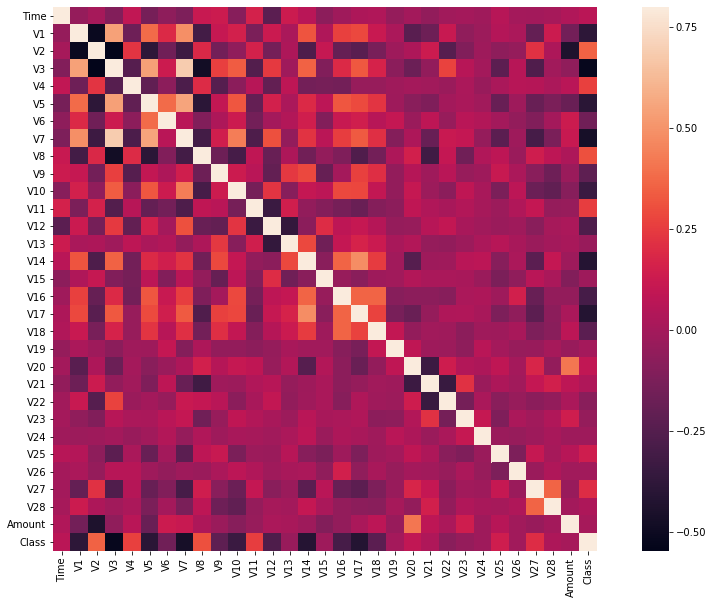

In [31]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (16,10))
sns.heatmap(corrmat,vmax = 0.8,square = True)

In [0]:
#get all the columns from dataframe
#columns = data.columns.to_list

#filter the columns to remove the unwanted columns
#columns = [c for c in columns if c not in ['Class']]

In [38]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
307,221,-1.177731,0.318501,1.727123,-0.549578,0.737292,-0.050963,0.555482,-0.041756,0.219520,-0.262389,-0.143990,-0.576367,-2.128980,0.045079,-1.132142,0.311233,-0.739914,0.326511,0.377478,-0.321357,-0.279324,-0.640571,-0.554584,-0.510508,0.403270,0.178327,-0.354579,-0.233332,25.36,0.0
10390,16740,1.211599,-0.254735,1.242430,0.478409,-1.209711,-0.492057,-0.831731,-0.006360,2.345568,-0.606076,0.200714,-2.732635,0.770854,1.287387,0.068777,0.384477,0.534963,0.283056,-0.255450,-0.153200,-0.086314,0.091098,-0.011576,0.383750,0.153317,1.073107,-0.070241,0.007905,15.00,0.0


In [0]:
X = data.iloc[:,0:30]
y = data.iloc[:,-1:]

In [64]:
print(X.shape);print();print(y.shape)

(1594, 30)

(1594, 1)


In [0]:
#X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [66]:
# define the oulier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),contamination=outlier_fraction, random_state=1),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

# Fit the model
n_outlier = len(fraud_cases)

for i, (clf_name,clf) in enumerate (classifiers.items()):
  #fit the data and tag outliers
  if clf_name == "Local Outlier Factor":
    y_prediction = clf.predict(X)
    score_predit = clf.negative_outlier_factor_
  else:
    clf.fit(X)
    score_predit = clf.decision_fucntion(X)
    y_prediction =  clf.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


ValueError: ignored

In [68]:
##Logistic Regression

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
from sklearn.linear_model import LogisticRegression

logg_reg_model = LogisticRegression()
logg_reg_model.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_logreg_prediction = logg_reg_model.predict(X_test)
y_logreg_prediction_prob = logg_reg_model.predict_proba(X_test)[:,1]

Confusion Martix:	 [[317   0]
 [  1   1]]
Accuracy 	 0.9968652037617555
Precision:	
Recall:	 0.5
AUC:	 0.7476340694006309


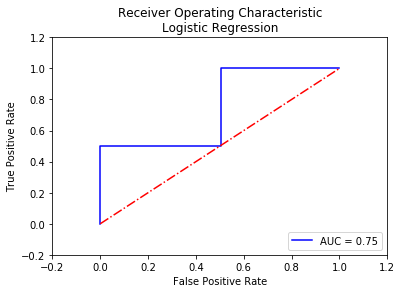

In [76]:
#Performance metrics evaluation
print("Confusion Martix:\t {}".format(confusion_matrix(y_test,y_logreg_prediction)))
print("Accuracy \t {}".format(accuracy_score(y_test,y_logreg_prediction)))
print("Precision:\t".format(precision_score(y_test,y_logreg_prediction)))
print("Recall:\t {}".format(recall_score(y_test,y_logreg_prediction)))
print("AUC:\t {}".format(roc_auc_score(y_test,y_logreg_prediction_prob)))
auc=roc_auc_score(y_test,y_logreg_prediction_prob)


#Ploting the ROC curve
fpr,tpr, thresholds = roc_curve(y_test,y_logreg_prediction_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**#K Nearest Neighbors**

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_knn_predict = knn.predict(X_test)
y_knn_predict_prob = knn.predict_proba(X_test)[:,1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Confusion Matrix 	[[317   0]
 [  2   0]]
Accuracy 	0.9937304075235109
Precision:	
Recall:	 0.0
AUC:	 0.49369085173501576


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


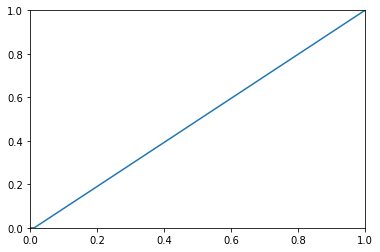

In [83]:
#metrics evaluation
print('Confusion Matrix \t{}'.format(confusion_matrix(y_test,y_knn_predict)))
print("Accuracy \t{}".format(accuracy_score(y_test,y_knn_predict)))
print("Precision:\t".format(precision_score(y_test,y_knn_predict)))
print("Recall:\t {}".format(recall_score(y_test,y_knn_predict)))
print("AUC:\t {}".format(roc_auc_score(y_test,y_knn_predict_prob)))

#ploting the ROC curve
fpr,tpr, thresholds = roc_curve(y_test,y_knn_predict_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()


**Random Forest Classifier**

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_rfc_predict = rfc.predict(X_test)

In [0]:
y_rfc_predict_prob = rfc.predict_proba(X_test)[:,1]

In [90]:
#Performance metrics evaluation
print("Confusion Matrix \t{}".format(confusion_matrix(y_test,y_rfc_predict)))
print("Accuracy \t{}".format(accuracy_score(y_test,y_rfc_predict)))
print("Precission \t{}".format(precision_score(y_test,y_rfc_predict)))
print("Recall \t{}".format(recall_score(y_test,y_rfc_predict)))
print("AUC \t{}".format(roc_auc_score(y_test,y_rfc_predict_prob)))
auc = roc_auc_score(y_test,y_rfc_predict_prob)

Confusion Matrix 	[[317   0]
 [  1   1]]
Accuracy 	0.9968652037617555
Precission 	1.0
Recall 	0.5
AUC 	0.7460567823343848


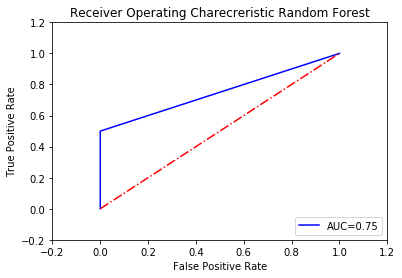

In [91]:
#Plotting the ROC curve
fpr,tpr,thresholds = roc_curve(y_test,y_rfc_predict)
plt.plot(fpr,tpr,'b',label ='AUC=%0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title("Receiver Operating Charecreristic Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()